# 회귀를 통해 이해하는 비용함수(Cost Function)

> 비용함수의 최소값 찾기, 선형회귀 모델인 경우 __MSE(Mean Squared Error)__

In [1]:
import numpy as np

## 📍 __numpy.poly1d()__

- poly1d : A one-dimensional polynomial class, 1차원(선형) 다항식

- 선형 다항식 : $\boxed{y = a_n\cdot x^n + a_{n-1}\cdot x^{n-1} + \;\cdots\; + a_2\cdot x^2 + a_1\cdot x + a_0}$

- poly1d([$\, a_n, \;a_{n-1}, \;\cdots, \;a_2, \;a_1, \;a_0 \,$])

In [2]:
f1 = np.poly1d([1,  1]) #--> x + 1
f2 = np.poly1d([1, -1]) #--> x - 1
f1, f2

(poly1d([1, 1]), poly1d([ 1, -1]))

In [3]:
f1 + f2 #--> (x + 1) + (x - 1) = 2x

poly1d([2, 0])

In [4]:
f1 * f2 #--> (x + 1) × (x - 1) = x² - 1

poly1d([ 1,  0, -1])

In [5]:
f3 = np.poly1d([1, -2, 1]) #--> x² - 2x + 1
f3

poly1d([ 1, -2,  1])

In [6]:
f3 / f2 #--> (x² - 2x + 1)/(x - 1) = x - 1

(poly1d([ 1., -1.]), poly1d([0.]))

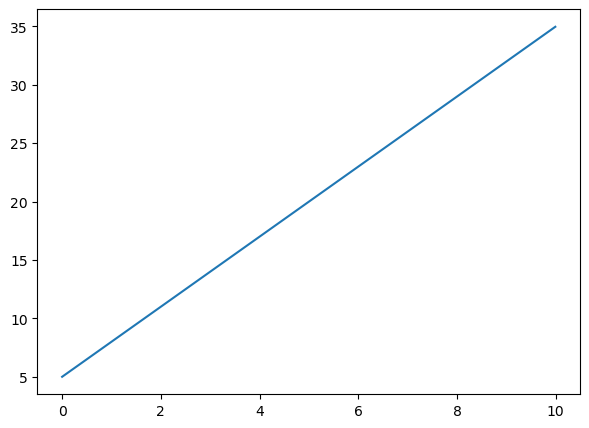

In [8]:
import matplotlib.pyplot as plt

t = np.arange(0, 10, 0.01)
y = 3*t + 5

plt.figure(figsize=(7,5))
plt.plot(t, y)
plt.show()

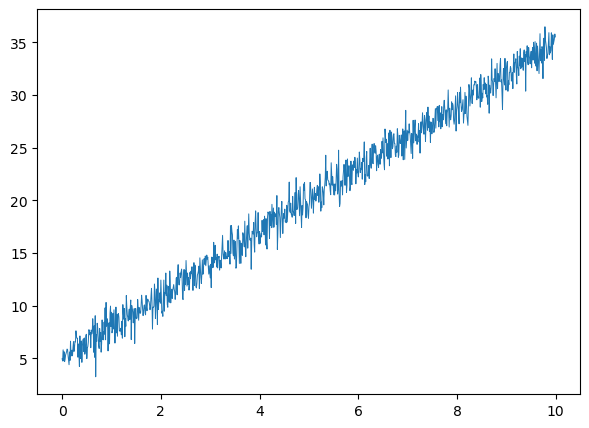

In [11]:
y_noise = y + np.random.randn(len(y))

plt.figure(figsize=(7,5))
plt.plot(t, y_noise, lw=.7)
plt.show()

In [13]:
fp1 = np.polyfit(t, y_noise, 1) #--> 1차식 (세 번째 인자는 함수의 차수)
fp1 #--> y_noise의 경향에 가장 잘 맞는(비용함수를 최소로 만드는) 계수를 찾는다.

array([2.99808312, 5.009433  ])

In [14]:
f1 = np.poly1d(fp1)
f1 #--> y_noise에서 예측한 선형회귀식

poly1d([2.99808312, 5.009433  ])

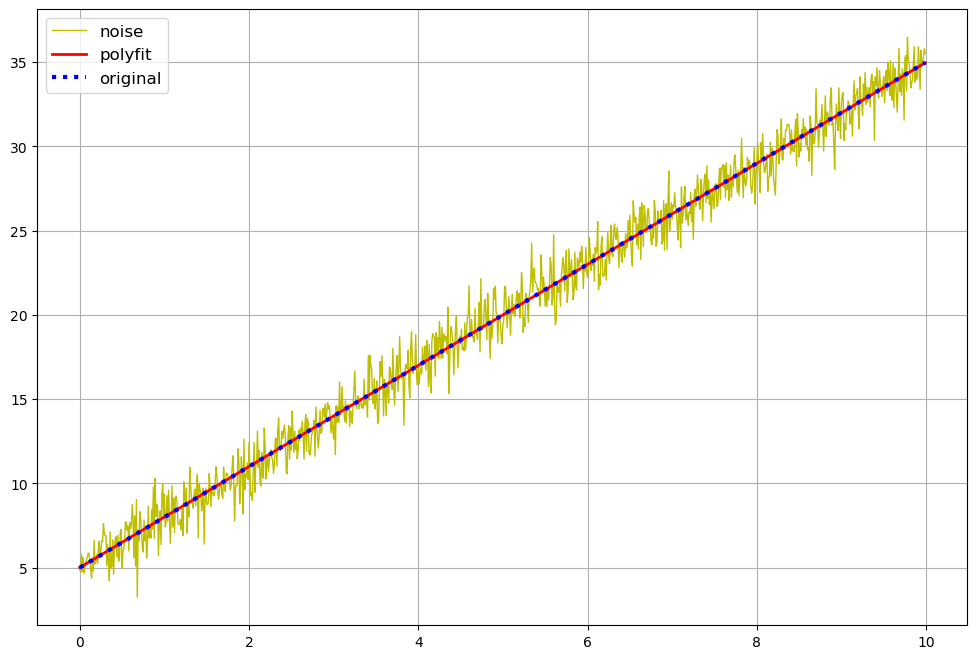

In [16]:
plt.figure(figsize=(12,8))
plt.plot(t, y_noise, label='noise', color='y', lw=1)
plt.plot(t, f1(t), label='polyfit', color='r', lw=2) #--> 예측값
plt.plot(t, y, label='original', color='b', ls=':', lw=3)
plt.legend(fontsize=12)
plt.grid()
plt.show()

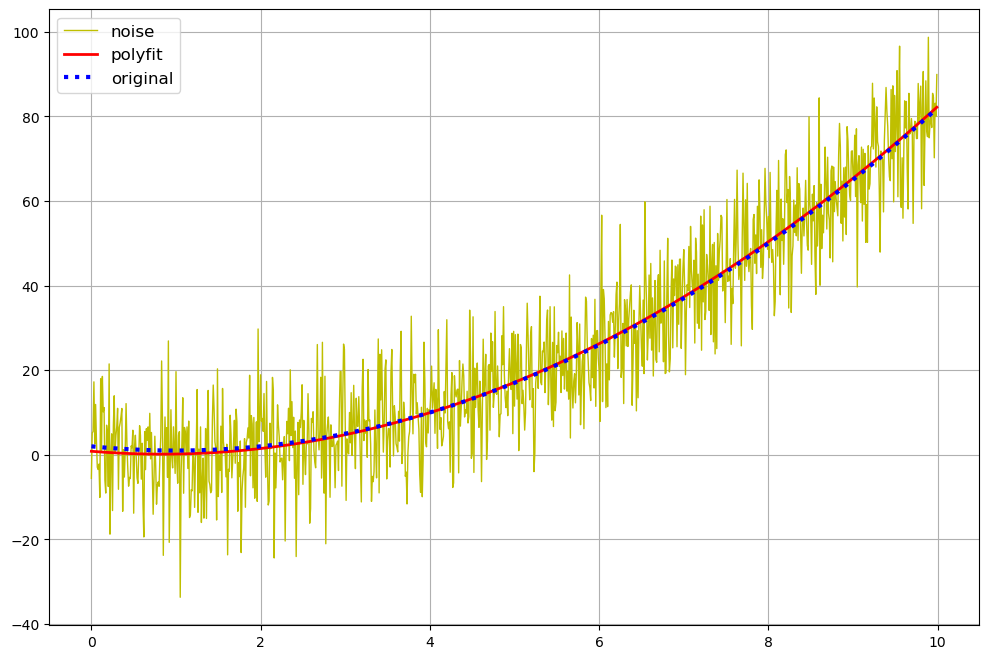

In [17]:
# 2차함수로 fit하고, 노이즈를 좀 많이 넣어보면 원 값과의 오차가 좀 생기겠죠^^

y = np.square(t-1) + 1
y_noise = y + 10*np.random.randn(len(y))
fp2 = np.polyfit(t, y_noise, 2) #--> 2차식 계수
f2 = np.poly1d(fp2)

plt.figure(figsize=(12,8))

plt.plot(t, y_noise, label='noise', color='y', lw=1)
plt.plot(t, f2(t), label='polyfit', color='r', lw=2) #--> 예측값
plt.plot(t, y, label='original', color='b', ls=':', lw=3)
plt.legend(fontsize=12)
plt.grid()
plt.show()

<br></br>

---

<br></br>

# Cost Function, $J(\theta)$

> 예제의 참 값과 예측 값에 대한 Cost Function(__MSE, Mean Squared Error__ 방식) 구하기

<img src="https://github.com/ElaYJ/supplement/assets/153154981/130a81f2-5cfb-490e-8751-3207aa50b34b" width="67%"></br>

$~\Rightarrow~~J(\theta)= {1 \over 3}\{\,(2\theta -1)^2 + (3\theta -5)^2 + (5\theta -6)^2\,\}$

In [18]:
np.poly1d([2,-1])**2 + np.poly1d([3, -5])**2 + np.poly1d([5,-6])**2

poly1d([ 38, -94,  62])

👉 비용함수

$~~~~~\large J(\theta) = 38\theta^2 -94\theta +62$

$~~~~~\dashrightarrow \small \text{숫자의 간결함을 위해 3으로 나누는 것은 하지 않는다.}$

</br>

## 📍 __`sympy` 라이브러리__

- 미분을 계산할 수 있는 라이브러리이다.

- 심파이는 $\text{심볼릭 연산(symbolic operation)}$을 지원하는 파이썬 패키지이다.

- 심볼릭 연산이란 사람이 연필로 계산하는 미분/적분과 동일한 형태의 연산을 말한다.</br>
	 즉, $x^2$의 미분 연산을 수행하면 그 결과가 $2x$란 형태로 출력된다.

In [19]:
# !pip install sympy

   ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.7 MB 653.6 kB/s eta 0:00:09
   --- ------------------------------------ 0.5/5.7 MB 4.8 MB/s eta 0:00:02
   -------- ------------------------------- 1.3/5.7 MB 7.4 MB/s eta 0:00:01
   ------------ --------------------------- 1.8/5.7 MB 8.1 MB/s eta 0:00:01
   --------------- ------------------------ 2.3/5.7 MB 8.6 MB/s eta 0:00:01
   ------------------- -------------------- 2.8/5.7 MB 9.0 MB/s eta 0:00:01
   ----------------------- ---------------- 3.3/5.7 MB 9.3 MB/s eta 0:00:01
   -------------------------- ------------- 3.8/5.7 MB 9.4 MB/s eta 0:00:01
   ------------------------------- -------- 4.5/5.7 MB 9.9 MB/s eta 0:00:01
   ------------------------------------ --- 5.2/5.7 MB 10.0 MB/s eta 0:00:01
   ---------------------------------------  5.7/5.7 MB 10.1 MB/s eta 0:00:01
   -------------------

In [25]:
import sympy as sym

# Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sym.init_printing(use_latex='mathjax')


#### --▶ 최소값 찾기

- 최소값을 찾기 위해 $J(\theta)\,$를 미분하여 $J'(\theta)=0\,$인 값을 찾는다.

In [26]:
theta = sym.Symbol('theta')
diff = sym.diff(38*theta**2 - 94*theta + 62, theta)
diff

76⋅θ - 94

In [27]:
94/76

1.236842105263158

👉 $\;\therefore~~ \theta=1.23684210526316$

$~~~~~~h_{\theta}(x)=\theta x ~~\Rightarrow~~ \boxed{~h_{\theta}(x)=1.24x~}$